In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [101]:
df = pd.read_csv("car details v4.csv")
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [102]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [103]:
df.duplicated().sum()

np.int64(0)

In [104]:
df['Length'].fillna(df['Length'].median(), inplace=True)
df['Width'].fillna(df['Width'].median(), inplace=True)

df['Height'].fillna(df['Height'].median(), inplace=True)
df['Seating Capacity'].fillna(df['Seating Capacity'].median(), inplace=True)
df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].median(), inplace=True)

df['Max Power'].fillna(df['Max Power'].mode()[0], inplace=True)
df['Engine'].fillna(df['Engine'].mode()[0], inplace=True)
df['Drivetrain'].fillna(df['Drivetrain'].mode()[0], inplace=True)
df['Max Torque'].fillna(df['Max Torque'].mode()[0], inplace=True)

In [105]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [106]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [107]:
df[['horsepower', 'rpm']] = df['Max Power'].str.extract(r'(\d+)\s*bhp\s*@\s*(\d+)\s*rpm').astype(float)
df['power_per_rpm'] = df['horsepower'] / df['rpm']
df = df.drop(['horsepower', 'rpm', 'Max Power'], axis=1)
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529


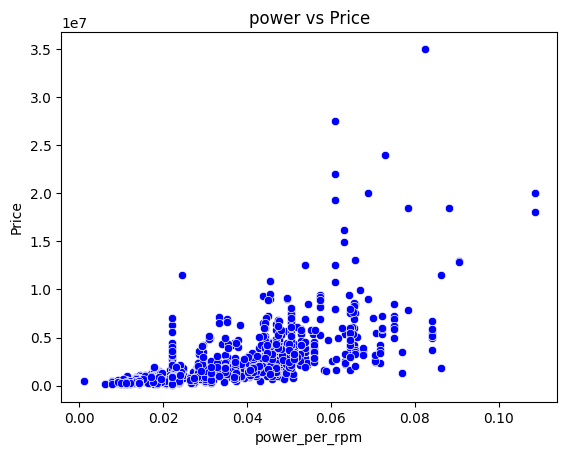

In [108]:
sns.scatterplot(data=df, x="power_per_rpm", y="Price", color = 'blue')
plt.title("power vs Price")
plt.show()

In [109]:
df[['NM', 'rpm']] = df['Max Torque'].str.extract(r'(\d+)\s*Nm\s*@\s*(\d+)\s*rpm').astype(float)
df['torque_per_rpm'] = df['NM'] / df['rpm']
df = df.drop(['NM', 'rpm', 'Max Torque'], axis=1)

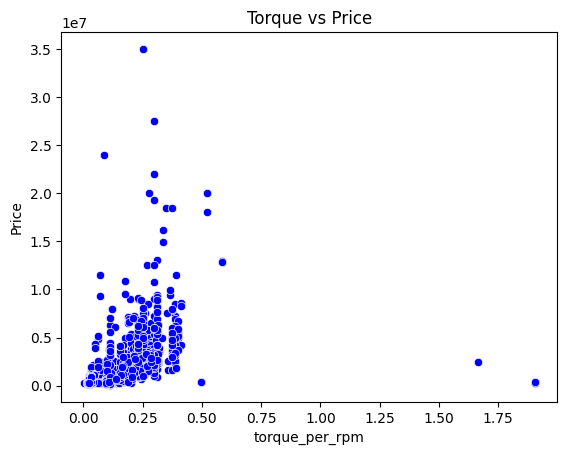

In [110]:
sns.scatterplot(data=df, x="torque_per_rpm", y="Price", color = 'blue')
plt.title("Torque vs Price")
plt.show()

In [111]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000


In [112]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Drivetrain              0
Length                  0
Width                   0
Height                  0
Seating Capacity        0
Fuel Tank Capacity      0
power_per_rpm         132
torque_per_rpm        128
dtype: int64

In [113]:
df['torque_per_rpm'].fillna(df['torque_per_rpm'].median(), inplace=True)
df['power_per_rpm'].fillna(df['power_per_rpm'].median(), inplace=True)

In [114]:
df['Engine'] = df['Engine'].str.replace('cc','').astype(float)

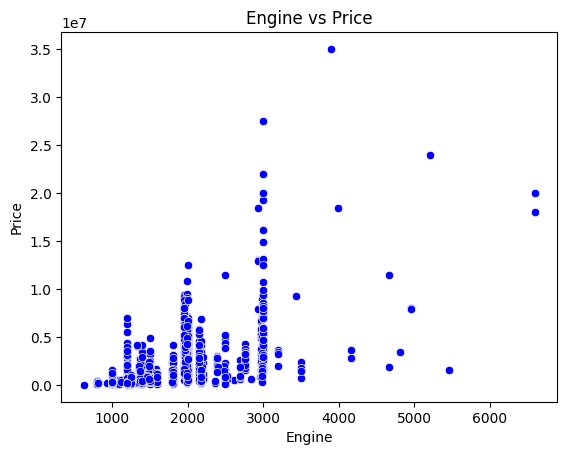

In [115]:
sns.scatterplot(data=df, x="Engine", y="Price", color = 'blue')
plt.title("Engine vs Price")
plt.show()

In [116]:
max_Year = df['Year'].max()
df['Age'] = max_Year - df['Year']
df = df.drop('Year', axis=1)

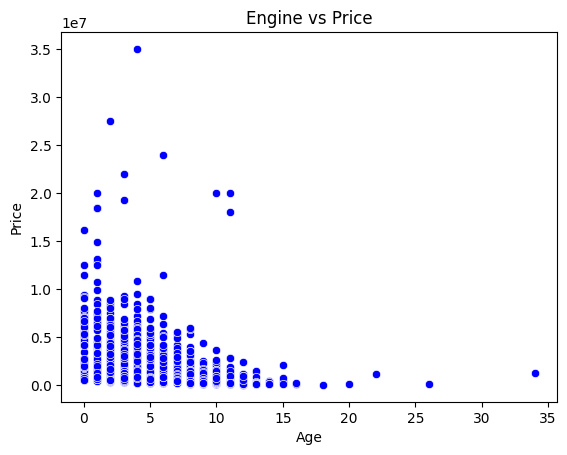

In [117]:
sns.scatterplot(data=df, x="Age", y="Price", color = 'blue')
plt.title("Engine vs Price")
plt.show()

In [118]:
df.head()

,Make,Model,Price,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,Honda,Amaze 1.2 VX i-VTEC,505000,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,Maruti Suzuki,Swift DZire VDI,450000,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
2,Hyundai,i10 Magna 1.2 Kappa2,220000,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750,11
3,Toyota,Glanza G,799000,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000,4


In [119]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 11
Num of Categorical Features : 9
Num of Discrete Features : 2
Num of Continuous Features : 9


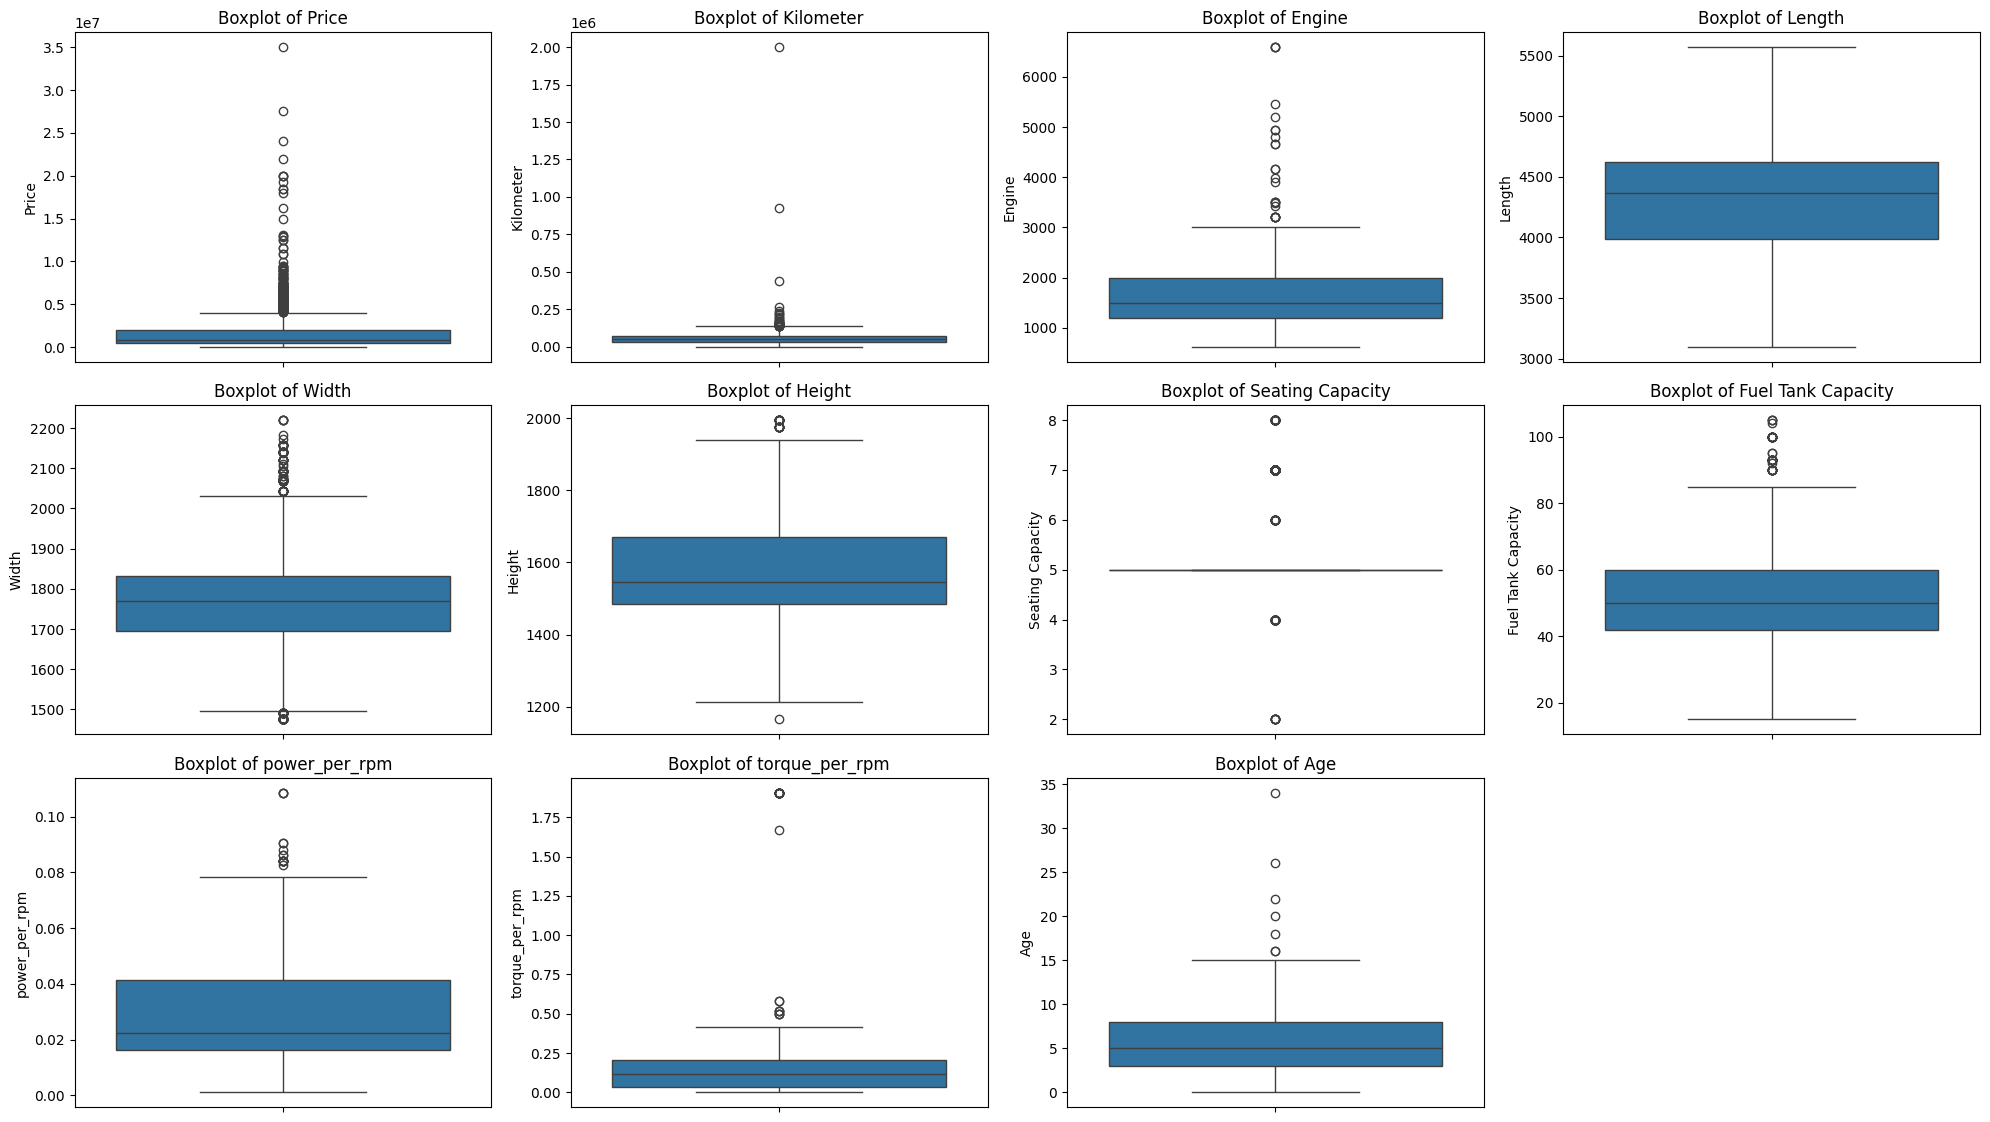

In [27]:
plt.figure(figsize=(20, 15))
for i in range(len(num_features)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[num_features[i]])
    plt.title(f'Boxplot of {num_features[i]}')
plt.tight_layout()
plt.show()

In [120]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [121]:
X.head()

,Make,Model,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,Honda,Amaze 1.2 VX i-VTEC,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,Maruti Suzuki,Swift DZire VDI,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
2,Hyundai,i10 Magna 1.2 Kappa2,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750,11
3,Toyota,Glanza G,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000,4


In [122]:
X=X.drop('Model',axis=1)

In [123]:
X.head()

,Make,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,Honda,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,Maruti Suzuki,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
2,Hyundai,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750,11
3,Toyota,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
4,Toyota,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000,4


In [124]:
X['Fuel Type'].value_counts()

Fuel Type
Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: count, dtype: int64

In [125]:
name_counts = X["Fuel Type"].value_counts()
X["Fuel Type"] = X["Fuel Type"].apply(lambda x: x if name_counts[x] > 50 else "Other")

In [126]:
X['Color'].value_counts()

Color
White     802
Silver    285
Grey      220
Blue      190
Black     163
Red       154
Brown      82
Maroon     37
Gold       30
Bronze     28
Green      17
Orange     16
Others     12
Yellow      9
Beige       8
Purple      5
Pink        1
Name: count, dtype: int64

In [127]:
name_counts = X["Color"].value_counts()
X["Color"] = X["Color"].apply(lambda x: x if name_counts[x] > 30 else "Other")

In [128]:
X['Owner'].value_counts()

Owner
First               1619
Second               373
Third                 42
UnRegistered Car      21
Fourth                 3
4 or More              1
Name: count, dtype: int64

In [129]:
name_counts = X["Owner"].value_counts()
X["Owner"] = X["Owner"].apply(lambda x: x if name_counts[x] > 30 else "Other")

In [130]:
X['Seller Type'].value_counts()

Seller Type
Individual                 1997
Corporate                    57
Commercial Registration       5
Name: count, dtype: int64

In [131]:
name_counts = X["Seller Type"].value_counts()
X["Seller Type"] = X["Seller Type"].apply(lambda x: x if name_counts[x] > 100 else "Other")

In [132]:
X.head()

,Make,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,Honda,87150,Petrol,Manual,Pune,Grey,First,Other,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,Maruti Suzuki,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
2,Hyundai,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750,11
3,Toyota,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
4,Toyota,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000,4


In [133]:
cat_features.remove('Model')

In [134]:
for feature in cat_features:
    print(feature)
    print(X[feature].value_counts())
    print('-------')
    print()

Make
Make
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
MG                17
Jaguar            17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Lamborghini        1
Ferrari            1
Name: count, dtype: int64
-------

Fuel Type
Fuel Type
Diesel    1049
Petrol     942
Other       68
Name: count, dtype: int64
-------

Transmission
Transmission
Manual       1133
Automatic     926
Name: count, dtype: int64
-------

Location
Location
Mumbai              342
Delhi               307

In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Make']=le.fit_transform(X['Make'])
X['Location']=le.fit_transform(X['Location'])

In [136]:
X.head()

,Make,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,7,87150,Petrol,Manual,56,Grey,First,Other,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,19,75000,Diesel,Manual,40,White,Second,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
2,8,67000,Petrol,Manual,39,Maroon,First,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750,11
3,30,37500,Petrol,Manual,41,Red,First,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
4,30,69000,Diesel,Manual,45,Grey,First,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000,4


In [137]:
X['Seating Capacity'].value_counts()

Seating Capacity
5.0    1679
7.0     273
4.0      42
8.0      35
6.0      23
2.0       7
Name: count, dtype: int64

In [138]:
X = X.drop('Seating Capacity', axis=1)

In [139]:
X.head()

,Make,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,7,87150,Petrol,Manual,56,Grey,First,Other,1198.0,FWD,3990.0,1680.0,1505.0,35.0,0.014500,0.024222,5
1,19,75000,Diesel,Manual,40,White,Second,Individual,1248.0,FWD,3995.0,1695.0,1555.0,42.0,0.018500,0.095000,8
2,8,67000,Petrol,Manual,39,Maroon,First,Individual,1197.0,FWD,3585.0,1595.0,1550.0,35.0,0.013167,1.904750,11
3,30,37500,Petrol,Manual,41,Red,First,Individual,1197.0,FWD,3995.0,1745.0,1510.0,37.0,0.013667,0.026905,3
4,30,69000,Diesel,Manual,45,Grey,First,Individual,2393.0,RWD,4735.0,1830.0,1795.0,55.0,0.043529,0.245000,4


In [140]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
num_features

Index(['Make', 'Kilometer', 'Location', 'Engine', 'Length', 'Width', 'Height',
       'Fuel Tank Capacity', 'power_per_rpm', 'torque_per_rpm', 'Age'],
      dtype='object')

In [141]:
onehot_columns = cat_features

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)
        
    ],remainder='passthrough'
    
)

In [142]:
X=preprocessor.fit_transform(X)

In [143]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.574133,1.233551,-0.744814,-0.673941,-0.661496,-0.635706,-1.149684,-0.885274,-0.664716,-0.170858
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.362268,0.403762,-0.666465,-0.662465,-0.548810,-0.263001,-0.673267,-0.639137,-0.286021,0.721270
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.222769,0.351900,-0.746381,-1.603494,-1.300046,-0.300271,-1.149684,-0.967319,9.397009,1.613398
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.291637,0.455623,-0.746381,-0.662465,-0.173193,-0.598435,-1.013565,-0.936552,-0.650363,-0.765609
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.257644,0.663071,1.127717,1.035978,0.465357,1.525984,0.211507,0.901029,0.516551,-0.468234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.629061,1.804031,0.792385,0.691699,0.916099,1.451443,1.232400,0.486939,0.309220,0.126518
2055,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.501768,-1.618850,-1.346531,-1.810061,-1.638102,-0.672976,-1.353862,-1.162178,-0.693995,0.721270
2056,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.327393,1.855893,-0.747948,-1.121503,-0.661496,-1.217126,-0.469089,-1.088337,-0.657879,1.018646
2057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108972,-1.048370,0.504062,1.497312,0.750827,-0.829513,0.892102,1.114588,0.428650,-0.468234


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape, X_test.shape

((1647, 28), (412, 28))

In [145]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [146]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [147]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor()
   
}
model_list = []
r2_list =[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1383932.1154
- Mean Absolute Error: 746020.3069
- R2 Score: 0.6340
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1853104.5077
- Mean Absolute Error: 851421.3308
- R2 Score: 0.5864


Lasso
Model performance for Training set
- Root Mean Squared Error: 1383932.1159
- Mean Absolute Error: 746016.0234
- R2 Score: 0.6340
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1853101.5174
- Mean Absolute Error: 851414.4266
- R2 Score: 0.5864


Ridge
Model performance for Training set
- Root Mean Squared Error: 1383976.9185
- Mean Absolute Error: 744643.5697
- R2 Score: 0.6339
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1853077.5321
- Mean Absolute Error: 849800.4034
- R2 Score: 0.5864


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1050567.3684


In [148]:
model_list

['Linear Regression',
 'Lasso',
 'Ridge',
 'K-Neighbors Regressor',
 'Decision Tree',
 'Random Forest Regressor',
 'Adaboost Regressor',
 'Graident BoostRegressor']

In [149]:
r2_list

[0.5863768901119955,
 0.586378224998869,
 0.5863889322189242,
 0.7717271302545856,
 0.7952478968792811,
 0.9024328216237584,
 0.6268592296595661,
 0.9225601680473893]

In [150]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,Graident BoostRegressor,0.922560
5,Random Forest Regressor,0.902433
4,Decision Tree,0.795248
3,K-Neighbors Regressor,0.771727
6,Adaboost Regressor,0.626859
2,Ridge,0.586389
1,Lasso,0.586378
0,Linear Regression,0.586377


In [154]:
rf_params = {
    "n_estimators": [100, 200, 500, 1000],
    "criterion" : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    "max_depth": [5, 8, 15, None, 10],
    "min_samples_split": [2, 8, 15, 20],
    "max_features": [5, 7, "auto", 8],
}
gradient_params={"loss": ['squared_error','huber','absolute_error','quantile'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10],
              "learning_rate": [0.1, 0.01, 0.02, 0.03]
            }

In [155]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params),
                   ("GradientBoost",GradientBoostingRegressor(),gradient_params)
                   ]

In [156]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None, 'criterion': 'absolute_error'}
---------------- Best Params for GradientBoost -------------------
{'n_estimators': 200, 'min_samples_split': 8, 'max_depth': 5, 'loss': 'huber', 'learning_rate': 0.1, 'criterion': 'squared_error'}


In [157]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=500, min_samples_split=2, max_features=8, max_depth=None,
                                                     criterion='absolute_error', n_jobs=-1),
    "GradientBoost Regressor": GradientBoostingRegressor(n_estimators=200, min_samples_split=8, max_depth=5,loss="huber",
                                                         learning_rate=0.1,criterion="squared_error")
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 381003.6120
- Mean Absolute Error: 116962.3114
- R2 Score: 0.9723
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1125732.8066
- Mean Absolute Error: 355881.0006
- R2 Score: 0.8474


GradientBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 298776.0904
- Mean Absolute Error: 100404.8457
- R2 Score: 0.9829
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 847488.0994
- Mean Absolute Error: 285999.1987
- R2 Score: 0.9135


